In [7]:
import cv2
import easyocr

from matplotlib import pyplot as plt

['07/10/2022 13:58', 'Lidando com', 'desbalanceamento de dados', 'Alura', 'Autores: Ana Clara_de_Andrade Mioto, João_Vitor de Miranda e Sthefanie Monica', 'Premebida', 'Em problemas de modelagem supervisionada focada em classificação; podemos nos', 'deparar com bases de dados em que a variável alvo contenha classes muito', 'desbalanceadas, isto é, contendo categorias com frequências muito diferentes.', 'Ao treinar um modelo de classificação com', 'variável desbalanceada, encontraremos', 'alguns problemas. Isso acontece porque 0 padrão dos dados para a classe dominante', 'vai se sobressair em relação aos da classe com menor frequência: Geralmente; nas', 'bases de dados que possuem', 'variável alvo desbalanceada, a classe com menor', 'frequência é justamente', 'que temos interesse em prever; 0 que torna os problemas', 'ainda maiores_', 'Como uma das classes tem', 'frequência muito grande, 0 modelo construído utilizando', 'dados desbalanceados pode apresentar acurácia bem elevada e ainda 

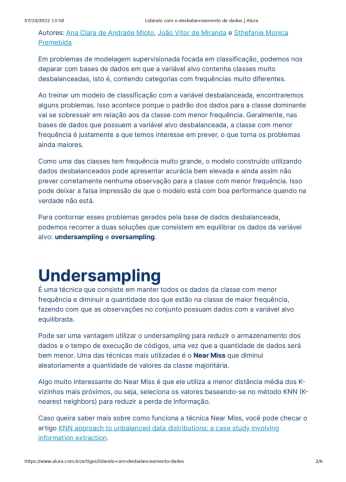

In [19]:
img = cv2.imread('images/artigo.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(rgb);

leitor = easyocr.Reader(lang_list=['pt'], gpu=True)

texto = leitor.readtext(image=rgb, detail=0)

print(texto);

In [49]:
import textwrap

texto = leitor.readtext(image=rgb, detail=0, paragraph=True)

for par in texto:
    linhas = textwrap.wrap(par, width=80)
    for linha in linhas:
        print(f"{linha}")
    print("\n")

07/10/2022 13:58


Lidando com desbalanceamento de dados Alura


Autores: Ana Clara_de_Andrade Mioto, João_Vitor de Miranda e Sthefanie Monica
Premebida


Em problemas de modelagem supervisionada focada em classificação; podemos nos
deparar com bases de dados em que a variável alvo contenha classes muito
desbalanceadas, isto é, contendo categorias com frequências muito diferentes.


Ao treinar um modelo de classificação com variável desbalanceada, encontraremos
alguns problemas. Isso acontece porque 0 padrão dos dados para a classe
dominante vai se sobressair em relação aos da classe com menor frequência:
Geralmente; nas bases de dados que possuem variável alvo desbalanceada, a classe
com menor frequência é justamente que temos interesse em prever; 0 que torna os
problemas ainda maiores_


Como uma das classes tem frequência muito grande, 0 modelo construído utilizando
dados desbalanceados pode apresentar acurácia bem elevada e ainda assim não
prever corretamente nenhuma observação par

In [56]:
img2 = cv2.imread("images/placa_rua.png")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


resultado = leitor.readtext(image=gray2)
resultado

[([[165, 124], [219, 124], [219, 167], [165, 167]], 'Rua', 0.9909666988403281),
 ([[225, 143], [329, 143], [329, 207], [225, 207]],
  'Felipe',
  0.9504850720815655),
 ([[524, 198], [610, 198], [610, 246], [524, 246]], 'Rua', 0.9995373692250141),
 ([[608, 242], [859, 242], [859, 316], [608, 316]],
  'Gustavo',
  0.9592266601362415),
 ([[616, 309], [849, 309], [849, 396], [616, 396]],
  'Krieger',
  0.9999887357604405),
 ([[512, 410], [593, 410], [593, 431], [512, 431]],
  'Prefeitura',
  0.999167404748162),
 ([[510, 425], [593, 425], [593, 446], [510, 446]],
  'Municipal',
  0.7801557091820912),
 ([[101, 437], [347, 437], [347, 473], [101, 473]],
  'A1 Cenac Rcnosn',
  0.0027681692239572998),
 ([[511, 443], [533, 443], [533, 457], [511, 457]], 'de', 0.9986484496491158),
 ([[834, 426], [955, 426], [955, 465], [834, 465]],
  'Centro',
  0.9999637916131051),
 ([[99, 479], [267, 479], [267, 515], [99, 515]],
  'oaleenong',
  0.0017458180106522585),
 ([[101, 514], [243, 514], [243, 553], [1

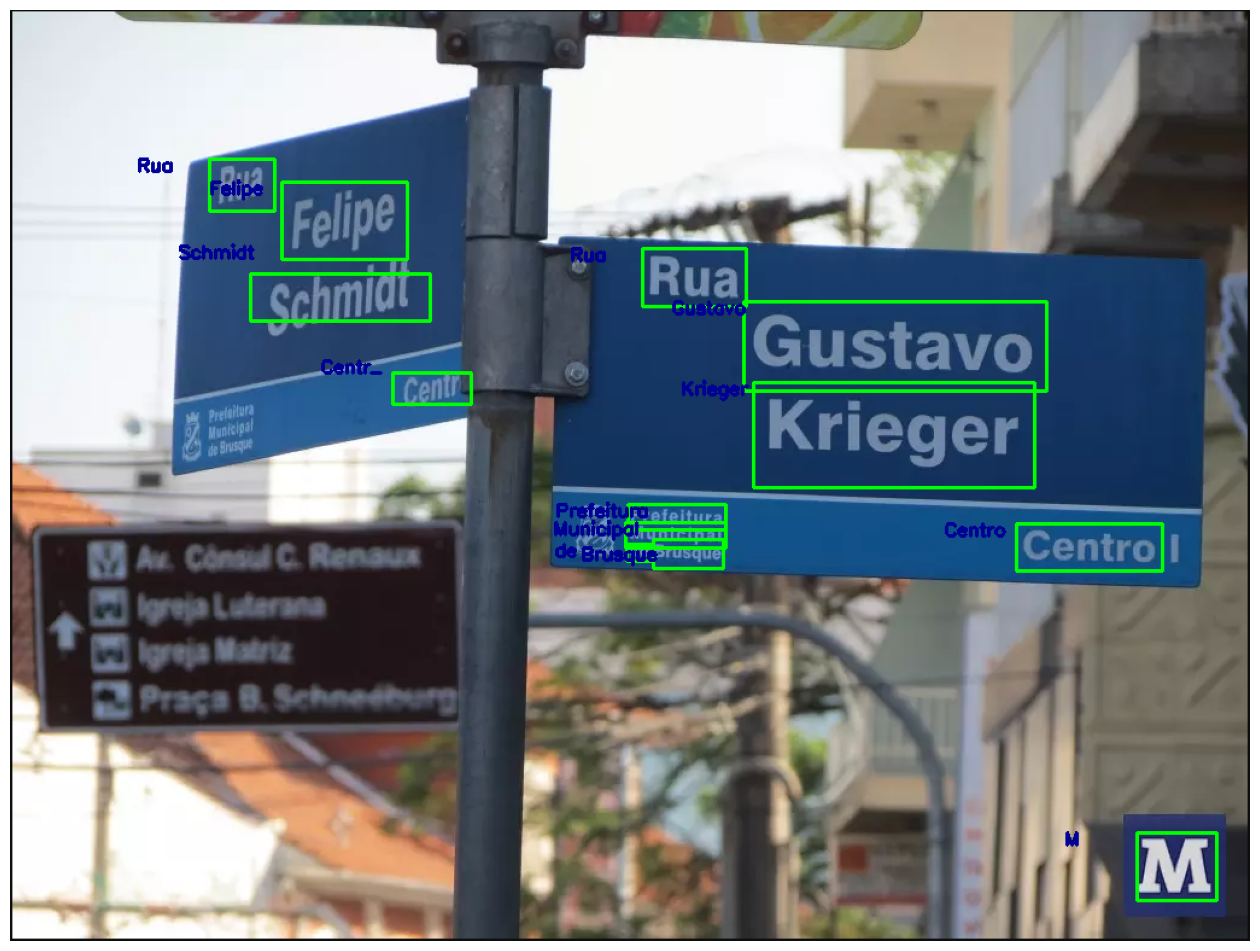

In [58]:
for (coordenadas, texto, probabilidade) in resultado:
    if probabilidade >= .7:
        (sup_esq, sup_dir, inf_dir, inf_esq) = coordenadas
        sup_esq = (int(sup_esq[0]), int(sup_esq[1]))
        sup_dir = (int(sup_dir[0]), int(sup_dir[1]))
        inf_dir = (int(inf_dir[0]), int(inf_dir[1]))
        inf_esq = (int(inf_esq[0]), int(inf_esq[1]))
        
        cv2.rectangle(rgb2, sup_esq, inf_dir, (0,255,0),2)
        cv2.putText(
            rgb2
            , texto
            , (sup_esq[0]-60, sup_dir[1]+10)
            , cv2.FONT_HERSHEY_SIMPLEX
            ,.5
            , (0,0,150)
            ,2
        )

plt.figure(figsize=(16,16))
plt.axis('off')
plt.imshow(rgb2);

46


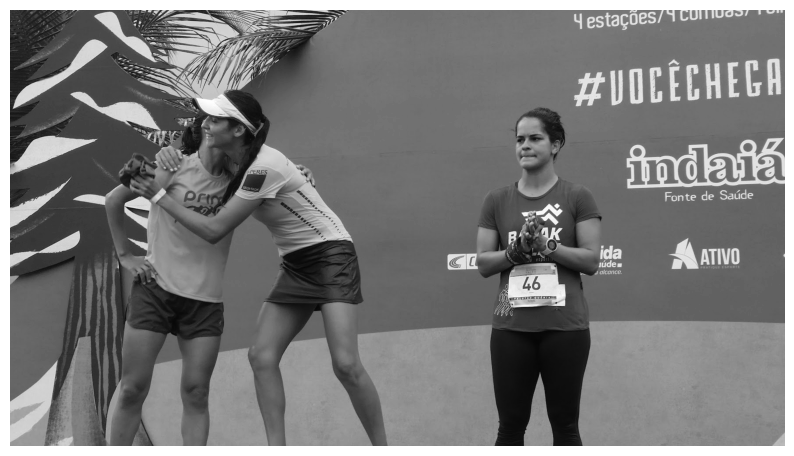

In [32]:
import re
textoStd = '\d*'
img = cv2.imread('images/corrida.jpg')
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(gray,cmap='gray');

leitor = easyocr.Reader(lang_list=['pt'], gpu=True)

lstTexto = leitor.readtext(image=gray, detail=0)

for texto in lstTexto:
    if len(re.search(textoStd, texto).group(0)) > 0:
    # break;
    # if re.search(textoStd, texto):
        print(texto);